# Assignment #1 (demo). Exploratory data analysis with Pandas

```{figure} /_static/img/ods_stickers.jpg
:name: ods_stickers
```

**<center>[mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course** </center><br>

Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline/). Translated and edited by [Sergey Isaev](https://www.linkedin.com/in/isvforall/), [Artem Trunov](https://www.linkedin.com/in/datamove/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/). All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.


**Same assignment as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset) + [solution](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset-solution).**

**In this task you should use Pandas to answer a few questions about the [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) dataset. (You don't have to download the data – it's already  in the repository). Choose the answers in the [web-form](https://docs.google.com/forms/d/1uY7MpI2trKx6FLWZte0uVh3ULV4Cm_tDud0VDFGCOKg).**

Unique values of features (for more information please see the link above):
- `age`: continuous;
- `workclass`: `Private`, `Self-emp-not-inc`, `Self-emp-inc`, `Federal-gov`, `Local-gov`, `State-gov`, `Without-pay`, `Never-worked`;
- `fnlwgt`: continuous;
- `education`: `Bachelors`, `Some-college`, `11th`, `HS-grad`, `Prof-school`, `Assoc-acdm`, `Assoc-voc`, `9th`, `7th-8th`, `12th`, `Masters`, `1st-4th`, `10th`, `Doctorate`, `5th-6th`, `Preschool`;
- `education-num`: continuous;
- `marital-status`: `Married-civ-spouse`, `Divorced`, `Never-married`, `Separated`, `Widowed`, `Married-spouse-absent`, `Married-AF-spouse`,
- `occupation`: `Tech-support`, `Craft-repair`, `Other-service`, `Sales`, `Exec-managerial`, `Prof-specialty`, `Handlers-cleaners`, `Machine-op-inspct`, `Adm-clerical`, `Farming-fishing`, `Transport-moving`, `Priv-house-serv`, `Protective-serv`, `Armed-Forces`;
- `relationship`: `Wife`, `Own-child`, `Husband`, `Not-in-family`, `Other-relative`, `Unmarried`;
- `race`: `White`, `Asian-Pac-Islander`, `Amer-Indian-Eskimo`, `Other`, `Black`;
- `sex`: `Female`, `Male`;
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: `United-States`, `Cambodia`, `England`, `Puerto-Rico`, `Canada`, `Germany`, `Outlying-US(Guam-USVI-etc)`, `India`, `Japan`, `Greece`, `South`, `China`, `Cuba`, `Iran`, `Honduras`, `Philippines`, `Italy`, `Poland`, `Jamaica`, `Vietnam`, `Mexico`, `Portugal`, `Ireland`, `France`, `Dominican-Republic`, `Laos`, `Ecuador`, `Taiwan`, `Haiti`, `Columbia`, `Hungary`, `Guatemala`, `Nicaragua`, `Scotland`, `Thailand`, `Yugoslavia`, `El-Salvador`, `Trinadad&Tobago`, `Peru`, `Hong`, `Holand-Netherlands`;
- `salary`: `>50K`, `<=50K`.

In [2]:
import numpy as np
import pandas as pd

pd.set_option("display.max.columns", 100)
# to draw pictures in jupyter notebook
%matplotlib inline
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [3]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [4]:
data = pd.read_csv(DATA_URL + "adult.data.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
data.salary.unique()

array(['<=50K', '>50K'], dtype=object)

<Axes: >

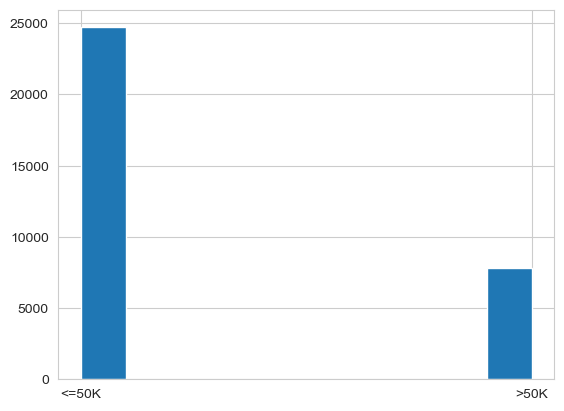

In [21]:
data.salary.hist()

<Axes: xlabel='age'>

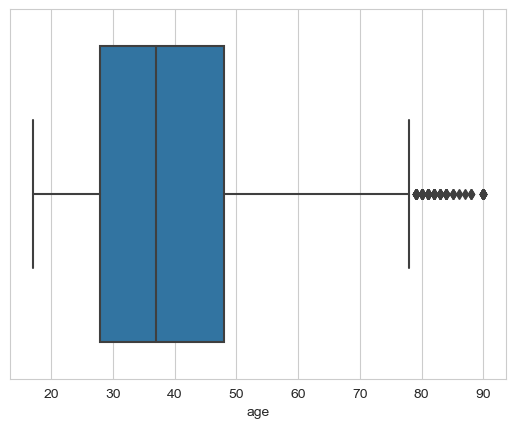

In [17]:
sns.boxplot(x='age', data=pd.DataFrame(data.age))

In [20]:
data.loc[0, 'age']

39

**1. How many men and women (*sex* feature) are represented in this dataset?**

In [26]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [23]:
data['sex'].value_counts(normalize=True)

Male      0.669205
Female    0.330795
Name: sex, dtype: float64

**2. What is the average age (*age* feature) of women?**

In [28]:
data[data['sex'] == 'Female']['age'].mean()

36.85823043357163

**3. What is the percentage of German citizens (*native-country* feature)?**

In [47]:
data['native-country'].value_counts(normalize=True)['Germany']

0.004207487485028101

**4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (*salary* feature) and those who earn less than 50K per year?**

In [53]:
data.groupby(by='salary')['age'].agg([np.mean, np.std])

,mean,std
salary,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


**6. Is it true that people who earn more than 50K have at least high school education? (*education* – `Bachelors`, `Prof-school`, `Assoc-acdm`, `Assoc-voc`, `Masters` or `Doctorate` feature)**

In [43]:
high_school_edu = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
data[data.salary == '>50K']['education'].apply(lambda x: x in high_school_edu)\
                                        .map({True: 'high ed', False: 'no high ed'})\
                                        .value_counts(normalize=True)

high ed       0.57837
no high ed    0.42163
Name: education, dtype: float64

**7. Display age statistics for each race (*race* feature) and each gender (*sex* feature). Use *groupby()* and *describe()*. Find the maximum age of men of `Amer-Indian-Eskimo` race.**

In [97]:
data.groupby(by=['race', 'sex'])['age'].describe().loc['Amer-Indian-Eskimo']

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,119.0,37.117647,13.114991,17.0,27.0,36.0,46.0,80.0
Male,192.0,37.208333,12.049563,17.0,28.0,35.0,45.0,82.0


**8. Among whom is the proportion of those who earn a lot (`>50K`) greater: married or single men (*marital-status* feature)? Consider as married those who have a *marital-status* starting with *Married* (`Married-civ-spouse`, `Married-spouse-absent` or `Married-AF-spouse`), the rest are considered bachelors.**

In [58]:
married_df = data[data['marital-status'].apply(lambda status: not status.startswith('Married'))]
married_df['salary'].value_counts(normalize=True)

<=50K    0.935546
>50K     0.064454
Name: salary, dtype: float64

In [50]:
data['married'] = data['marital-status'].apply(lambda status: status.startswith('Married'))\
                                        .map({False: 'not married', True: 'married'})
pd.crosstab(data['married'], data['salary'], margins=True)

salary,<=50K,>50K,All
married,,,
married,8681,6736,15417
not married,16039,1105,17144
All,24720,7841,32561


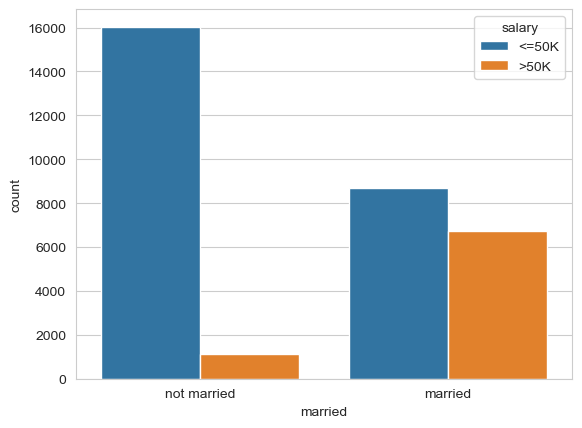

In [51]:
sns.countplot(x="married", hue="salary", data=data);

In [59]:
# here I had a theory that salary doesn't really correlate with marital status, \
# but with age. Indeed, it seems that married people on average are older, \
# which can partially be the reason why they earn more

data.pivot_table(values='age', index='married', aggfunc='mean')

,age
married,
married,43.159175
not married,34.465236


In [57]:
data.groupby(by=['salary', 'married'])['age'].describe()

count       mean        std   min   25%   50%   75%  \
salary married                                                              
<=50K  married       8681.0  42.172100  13.155227  17.0  32.0  40.0  51.0   
       not married  16039.0  33.867323  13.604174  17.0  23.0  30.0  42.0   
>50K   married       6736.0  44.431265  10.394149  19.0  37.0  44.0  51.0   
       not married   1105.0  43.143891  11.191843  19.0  35.0  43.0  51.0   

                     max  
salary married            
<=50K  married      90.0  
       not married  90.0  
>50K   married      90.0  
       not married  90.0

**9. What is the maximum number of hours a person works per week (*hours-per-week* feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (`>50K`) among them?**

In [72]:
max_hpw = data['hours-per-week'].max()
max_hpw_df = data[data['hours-per-week'] == max_hpw]
max_hpw_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.0
mean,43.517647,161462.129412,10.611765,799.529412,125.717647,99.0
std,13.339533,103387.089190,3.415978,2932.860012,508.916838,0.0
min,19.000000,24790.000000,4.000000,0.000000,0.000000,99.0
25%,34.000000,89681.000000,9.000000,0.000000,0.000000,99.0
50%,42.000000,158712.000000,10.000000,0.000000,0.000000,99.0
75%,51.000000,208826.000000,13.000000,0.000000,0.000000,99.0
max,90.000000,511289.000000,16.000000,15024.000000,2415.000000,99.0


In [73]:
max_hpw_df['salary'].value_counts(normalize=True)

<=50K    0.705882
>50K     0.294118
Name: salary, dtype: float64

**10. Count the average time of work (*hours-per-week*) for those who earn a little and a lot (*salary*) for each country (*native-country*). What will these be for Japan?**

In [93]:
data.groupby(by=['native-country', 'salary'])['hours-per-week'].describe().loc['Japan']

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,38.0,41.000000,11.902759,10.0,40.0,40.0,41.5,65.0
>50K,24.0,47.958333,16.120414,21.0,40.0,42.5,50.0,99.0
